In [1]:
import pandas as pd

df = pd.read_csv("infection_root_barcodes.csv")

print(df.head())

   human_id  t  SNP_0  SNP_1  SNP_2  SNP_3  SNP_4  SNP_5  SNP_6  SNP_7  ...  \
0      2533  0      0      0      0      0      0      0      0      0  ...   
1      4920  0      1      1      1      1      1      1      1      1  ...   
2      7974  0      2      2      2      2      2      2      2      2  ...   
3      5997  0      3      3      3      3      3      3      3      3  ...   
4      2184  0      4      4      4      4      4      4      4      4  ...   

   SNP_14  SNP_15  SNP_16  SNP_17  SNP_18  SNP_19  SNP_20  SNP_21  SNP_22  \
0       0       0       0       0       0       0       0       0       0   
1       1       1       1       1       1       1       1       1       1   
2       2       2       2       2       2       2       2       2       2   
3       3       3       3       3       3       3       3       3       3   
4       4       4       4       4       4       4       4       4       4   

   SNP_23  
0       0  
1       1  
2       2  
3       3  
4 

In [2]:
import numpy as np

In [3]:
df_t = df[df["t"] == 1490]

In [4]:
df_t.shape

(17585, 26)

In [5]:
all_genomes = df_t[[f"SNP_{i}" for i in range(24)]].values

In [6]:
all_genomes.ravel()

array([5885, 5885, 5885, ..., 7047, 7047, 7047], dtype=int64)

In [7]:
roots, counts = np.unique(all_genomes.ravel(), return_counts=True)

root_count_df = pd.DataFrame({"root": roots, "count": counts})

In [8]:
# Fill in the missing roots
root_count_df = pd.merge(root_count_df, pd.DataFrame({"root": np.arange(4000)}), on="root", how="right").fillna(0)

<BarContainer object of 928 artists>

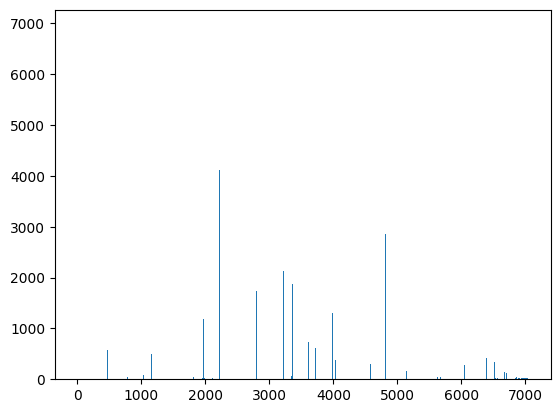

In [9]:
from matplotlib import pyplot as plt

plt.bar(roots, counts)

(array([3.682e+03, 4.700e+01, 1.700e+01, 2.000e+01, 1.800e+01, 1.900e+01,
        1.500e+01, 1.500e+01, 2.000e+01, 1.100e+01, 9.000e+00, 8.000e+00,
        5.000e+00, 4.000e+00, 6.000e+00, 7.000e+00, 9.000e+00, 3.000e+00,
        1.000e+01, 3.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 2.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

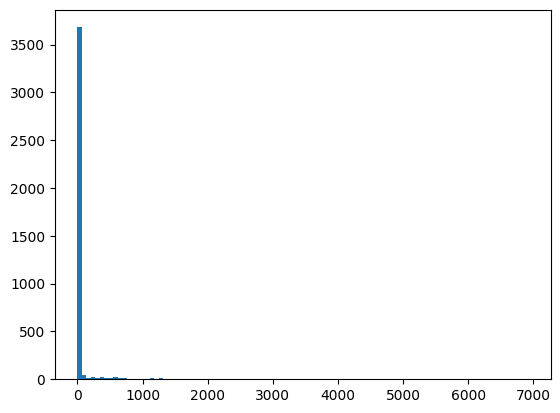

In [10]:
plt.hist(root_count_df["count"], bins=100)

In [11]:
np.median(root_count_df["count"])

0.0

In [12]:
np.sum(root_count_df["count"]>0)

398

(array([183.,  79.,  32.,  32.,  24.,  16.,   6.,   7.,   4.,   1.,   1.,
          3.,   2.,   3.,   0.,   2.,   0.,   2.,   0.,   1.]),
 array([1.0000e+00, 3.4720e+02, 6.9340e+02, 1.0396e+03, 1.3858e+03,
        1.7320e+03, 2.0782e+03, 2.4244e+03, 2.7706e+03, 3.1168e+03,
        3.4630e+03, 3.8092e+03, 4.1554e+03, 4.5016e+03, 4.8478e+03,
        5.1940e+03, 5.5402e+03, 5.8864e+03, 6.2326e+03, 6.5788e+03,
        6.9250e+03]),
 <BarContainer object of 20 artists>)

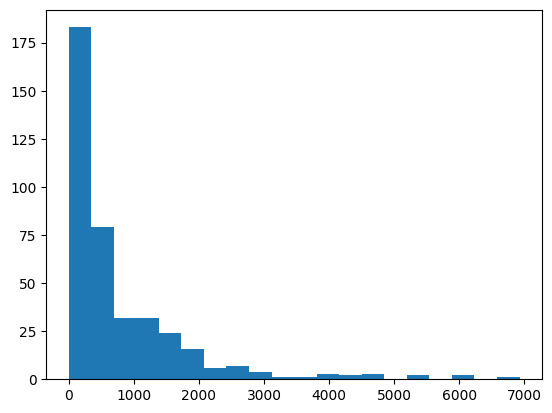

In [13]:
plt.hist(root_count_df["count"][root_count_df["count"]>0], bins=20)

In [14]:
np.sum(root_count_df["count"])

308616.0

In [15]:
407472/24

16978.0

In [16]:
np.max(root_count_df["count"])/np.sum(root_count_df["count"])

0.02243888845685253